Play store apps dataset

In [1]:
import urllib.robotparser
rp = urllib.robotparser.RobotFileParser()
rp.set_url("https://www.etsy.com/robots.txt")
rp.read()
rp.crawl_delay("*")
test_crawl_url="https://play.google.com/store/apps/details?id=com.wildnotion.poetscorner"
can_crawl_listings = rp.can_fetch("*", test_crawl_url)
print("We can crawl Google Play? {0}".format(can_crawl_listings))

We can crawl Google Play? True


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 12]
sns.set_theme(style = "darkgrid",palette="pastel")

In [3]:
df = pd.read_csv("google-play-store-11-2018.csv")
df.head(5)

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star
0,com.prettyteengames.royal.princess.wedding.mak...,Royal Princess Wedding Makeover and Dress Up,375.0,1023.0,100000,4.179863,True,True,2017-12-20,3,Casual,GAME_CASUAL,0.0,115,31,98,90,689
1,com.MayGreenStudio.dressup,Momo's Dressup,13492.0,25974.0,1000000,4.711096,False,True,2017-03-07,42,Casual,GAME_CASUAL,0.0,673,213,806,2561,21721
2,air.theflash.f2game.PrettyGirl23,Princess Pretty Girl,1974.0,4610.0,500000,4.295445,False,True,2015-01-18,3,Casual,GAME_CASUAL,0.0,382,206,287,528,3207
3,air.com.dressupone.animeschooluniforms,Anime School Uniforms,2586.0,6081.0,500000,4.209505,False,True,2013-08-20,3,Casual,GAME_CASUAL,0.0,628,193,524,668,4068
4,air.theflash.f2game.PrettyGirl7,Wedding Pretty girl,1409.0,3728.0,500000,4.195011,False,True,2014-09-01,2,Casual,GAME_CASUAL,0.0,358,185,300,414,2471


In [4]:
df.describe()

,reviews,ratings,min_installs,score,ratings_per_day,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star
count,6.268300e+04,6.268300e+04,6.269400e+04,62683.000000,62694.000000,62694.000000,6.269400e+04,6.269400e+04,6.269400e+04,6.269400e+04,6.269400e+04
mean,1.529843e+04,4.936328e+04,2.035663e+06,4.221624,38.620506,0.414998,3.078124e+03,1.211618e+03,3.094328e+03,7.227599e+03,3.474295e+04
std,2.261505e+05,7.690255e+05,2.386872e+07,0.815517,430.422770,3.793236,6.050231e+04,2.193403e+04,5.230251e+04,1.117066e+05,5.368042e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.600000e+01,4.100000e+01,1.000000e+03,4.100497,0.000000,0.000000,2.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.800000e+01
50%,1.440000e+02,3.980000e+02,5.000000e+04,4.403101,0.000000,0.000000,2.400000e+01,9.000000e+00,2.300000e+01,4.700000e+01,2.640000e+02
75%,1.500000e+03,4.488000e+03,5.000000e+05,4.637007,6.000000,0.000000,3.070000e+02,1.090000e+02,2.840000e+02,6.090000e+02,2.933000e+03
max,2.205377e+07,8.128486e+07,1.000000e+09,5.000000,40526.000000,369.990000,9.658715e+06,3.368101e+06,7.164984e+06,1.222342e+07,5.295266e+07


In [5]:
df['genre'].unique()

array(['Casual', 'Tools', 'Medical', 'Food & Drink', 'Lifestyle', 'Card',
       'Entertainment', 'House & Home', 'Productivity', 'Communication',
       'Video Players & Editors', 'Shopping', 'Finance', 'Music & Audio',
       'Personalization', 'Simulation', 'Education', 'Sports',
       'Auto & Vehicles', 'Action', 'Photography', 'News & Magazines',
       'Weather', 'Business', 'Travel & Local', 'Educational',
       'Books & Reference', 'Health & Fitness', 'Racing',
       'Libraries & Demo', 'Role Playing', 'Adventure', 'Arcade',
       'Social', 'Maps & Navigation', 'Board', 'Puzzle', 'Strategy',
       'Art & Design', 'Trivia', 'Parenting', 'Comics', 'Word', 'Casino',
       nan, 'Events', 'Dating', 'Music', 'Beauty'], dtype=object)

In [6]:
g = df.groupby(['genre','min_installs'])
l = df['genre'].unique()
g.first(10)

dict = {}

for group,data in g:
    for i in range(len(l)):
        if group[0] == l[i]:
            if group[0] not in dict:
                dict[group[0]]=group[1]
            else:
                dict[group[0]]+=group[1]

a = sorted(dict.items() ,key = lambda x: x[1])

<AxesSubplot:xlabel='sum'>

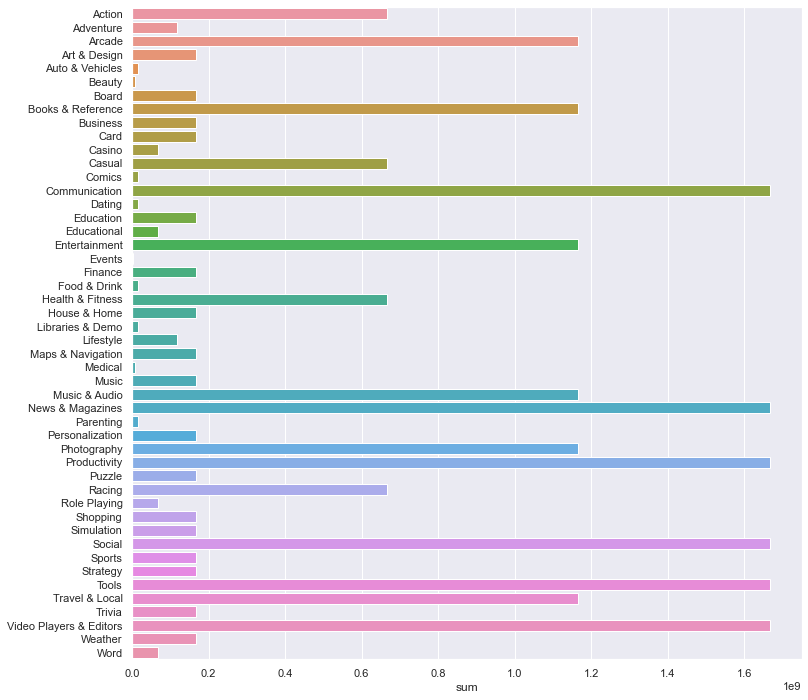

In [7]:
installs = pd.DataFrame.from_dict(dict,orient='index',columns = ['sum'])
installs

sns.barplot(x = 'sum', y = installs.index, data = installs)

In [8]:
df.columns

Index(['app_id', 'title', 'reviews', 'ratings', 'min_installs', 'score',
       'offers_iap', 'ad_supported', 'released', 'ratings_per_day', 'genre',
       'genre_id', 'price', 'rating_one_star', 'rating_two_star',
       'rating_three_star', 'rating_four_star', 'rating_five_star'],
      dtype='object')

In [9]:
df['released'] = pd.to_datetime(df['released'])
today = date.today()
d1 = today.strftime("%Y-%m-%d")
today = np.datetime64(d1[:4]+'-'+d1[5:7]+'-'+d1[8:10])
lowest = df['released'].min()
latest = df['released'].max()
print(lowest,latest)
diff = today - lowest
print(int(diff.days))

2010-01-28 00:00:00 2018-11-12 00:00:00
4294


In [10]:
g2 = df.groupby(['genre'])

dict1 = g2.agg({'released': np.min})

d = dict1.to_dict()

min_date = {}
days_since = {}

for values in d.values():
    for k,v in values.items():
        min_date[k] = v

dates = pd.DataFrame.from_dict(min_date,orient='index')

print(dates.head(5))
dates.dtypes

                         0
Action          2010-06-30
Adventure       2011-08-26
Arcade          2010-03-19
Art & Design    2010-07-19
Auto & Vehicles 2010-10-01


0    datetime64[ns]
dtype: object

In [11]:
dates = (today - dates[0]).dt.days

In [12]:
# new_perday = pd.concat(['installs','dates'])
dates.dtypes

dtype('int64')

In [13]:
dat1 = zip(dates.index,dates)

In [14]:
installs_copy = pd.DataFrame.from_dict(dict,orient='index')

In [15]:
value = dates
installs_copy.insert(0,1,value)

In [16]:
installs_copy

,1,0
Action,4141,666666600
Adventure,3719,116666610
Arcade,4244,1166666665
Art & Design,4122,166666660
Auto & Vehicles,4048,16666660
Beauty,3967,6666660
Board,4290,166666650
Books & Reference,4293,1166666660
Business,4282,166666660
Card,4293,166666650


In [18]:
installs_copy['per_day'] = installs_copy[0]/installs_copy[1]

In [26]:
installs_copy[installs_copy['per_day']==installs_copy['per_day'].max()]

,1,0,per_day
Video Players & Editors,4166,1666666660,400064.008641


In [27]:
installs_copy[installs_copy['per_day']==installs_copy['per_day'].min()]

,1,0,per_day
Events,3590,1666660,464.250696
